# Plot results of Sobol sensitivity analysis

### Import packages 

In [24]:

import itertools as it
import numpy as np;
import pandas as pd;
from pandas import *
import os, sys
from os.path import dirname

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as font_manager
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
import seaborn as sns

import string
import plotly.graph_objects as go
from textwrap import wrap
import pickle
import glob

parent_dir = (dirname(os.getcwd()))

import SALib
from SALib.analyze import sobol
from SALib.sample import saltelli
from SALib.plotting.bar import plot as barplot


### Set defaults for figures 

In [25]:
title_font = {'fontname':'Myriad', 'size':'16', 'color':'black', 'weight':'normal',
              'verticalalignment':'bottom'} # Bottom vertical alignment for more space
axis_font = {'fontname':'Myriad', 'size':'16'}
sub_plot = {'fontname':'Myriad', 'size':'18','color':'black', 
            'horizontalalignment':'left', 'verticalalignment':'center'}

CB_color_cycle = ['#377eb8', '#ff7f00', '#4daf4a',
                  '#f781bf', '#a65628', '#984ea3',
                  '#999999', '#e41a1c', '#dede00']
cb=sns.color_palette(CB_color_cycle,as_cmap=True)

# sns.palplot(sns.color_palette(cb))
cb=sns.color_palette("colorblind")

newcmp = ListedColormap(cb)
newcmp

### Define Sobol parameters

In [26]:
problem = {
    'num_vars': 6,
    'names': ['1_k_width', '2_frouted','3_n_perv','4_n_imperv','5_d_perv','6_d_imperv'],
    'bounds': [[0.01, 0.1],
               [0.,1.],
              [0.02,0.5],
              [0.01,0.02],
              [2,6],
              [0,3]]}

with open('sobol_problem.pickle', 'rb') as handle:
    params = pickle.load(handle)
    params_df = pd.DataFrame(params)

In [27]:
# check length
len(params_df[1].unique())
print(100*(2*6+2))
len(params_df)

1400


1400

### Plot sobol results

In [28]:
def sobol_(Y,P,Ks,fI,S):
    """
    
    Function assign compile output files into a single file
    and parameter names to sobol problem
    
    intputs:
        Y = file path to output file
        P = rainfall scenario
        Ks = saturated hydraulic conductivity
        fI = impervious fraction
        S = slope
        
    outputs:
        Si_df = dataframe of sobol variance metrics for the output file

    """

    # analyze output file to get sobol metrics
    Si = sobol.analyze(problem, Y, print_to_console=False)

    #get variance metrics from Si
    S1      = Si['S1']
    S1_conf = Si['S1_conf']
    ST      = Si['ST']
    ST_conf = Si['ST_conf']
    S2      = Si['S2']
    S2_conf = Si['S2_conf']

    # get parameters
    k_width=params[:,0] 
    f_routed=params[:,1]
    n_perv=params[:,2]
    n_imperv= params[:,3]
    d_perv=params[:,4]
    d_imperv=params[:,5]
    
    zipped=zip(problem['names'], Si['S1'], Si['ST'], params.mean(axis=0))
    Si_df=pd.DataFrame(zipped,columns=["Name", "1st","Total", "Mean of Input"])
    Si_df['p'] = float(P)
    Si_df['Ks'] = float(Ks)
    Si_df['fI'] = float(fI)
    Si_df['S'] = float(S)
    
    #return Si_df dataframe of the sobol metrics with associated P, Ks, fI, and S
    return Si_df

In [29]:

#loop through all files in sensitivity folder, apply the Sobol_ functions, compile into Si_all
path = 'out\\sensitivity'
allFiles = glob.glob(path + "/*.pickle")
frame = pd.DataFrame()
list_ = []

for file_ in allFiles:
    with open(file_, 'rb') as handle:
        Y = pickle.load(handle)
        scenario=file_.split("\\")[2]
        Pks=scenario.split(".pickle")[0]
       
        P_=Pks.split(",")[0]
        P=P_.split("_")[1]
        Ks_=Pks.split(",")[1]
        Ks=Ks_.split("_")[1]
        print(Pks)
        fI=Pks.split(",")[2].split("_")[1]
        S=Pks.split(",")[3].split("_")[1]

        Pks=sobol_(Y,P,Ks,fI,S)
    list_.append(Pks)
    temp = pd.concat(list_)
    Si_all=temp.reset_index().drop(['index'], axis=1)

P_2,Ks_20,fI_0.1,S_1
P_2,Ks_20,fI_0.1,S_10
P_2,Ks_20,fI_0.1,S_5
P_2,Ks_20,fI_0.3,S_1
P_2,Ks_20,fI_0.3,S_10
P_2,Ks_20,fI_0.3,S_5
P_2,Ks_20,fI_0.5,S_1
P_2,Ks_20,fI_0.5,S_10
P_2,Ks_20,fI_0.5,S_5
P_2,Ks_20,fI_0.7,S_1
P_2,Ks_20,fI_0.7,S_10
P_2,Ks_20,fI_0.7,S_5
P_2,Ks_20,fI_0.9,S_1
P_2,Ks_20,fI_0.9,S_10
P_2,Ks_20,fI_0.9,S_5
P_2,Ks_50,fI_0.1,S_1
P_2,Ks_50,fI_0.1,S_10
P_2,Ks_50,fI_0.1,S_5
P_2,Ks_50,fI_0.3,S_1
P_2,Ks_50,fI_0.3,S_10
P_2,Ks_50,fI_0.3,S_5
P_2,Ks_50,fI_0.5,S_1
P_2,Ks_50,fI_0.5,S_10
P_2,Ks_50,fI_0.5,S_5
P_2,Ks_50,fI_0.7,S_1
P_2,Ks_50,fI_0.7,S_10
P_2,Ks_50,fI_0.7,S_5
P_2,Ks_50,fI_0.9,S_1
P_2,Ks_50,fI_0.9,S_10
P_2,Ks_50,fI_0.9,S_5
P_2,Ks_80,fI_0.1,S_1
P_2,Ks_80,fI_0.1,S_10
P_2,Ks_80,fI_0.1,S_5
P_2,Ks_80,fI_0.3,S_1
P_2,Ks_80,fI_0.3,S_10
P_2,Ks_80,fI_0.3,S_5
P_2,Ks_80,fI_0.5,S_1
P_2,Ks_80,fI_0.5,S_10
P_2,Ks_80,fI_0.5,S_5
P_2,Ks_80,fI_0.7,S_1
P_2,Ks_80,fI_0.7,S_10
P_2,Ks_80,fI_0.7,S_5
P_2,Ks_80,fI_0.9,S_1
P_2,Ks_80,fI_0.9,S_10
P_2,Ks_80,fI_0.9,S_5
P_5,Ks_20,fI_0.1,S_1
P_5,Ks_20,fI_0.1,S_

In [12]:
# get unique scenario values

Si_all['p_Ks']=Si_all['p']/Si_all['Ks']*10.
ratios = np.unique(Si_all.p_Ks)
Ps = np.unique(Si_all.p)
Kss = np.unique(Si_all.Ks)
fIs = np.unique(Si_all.fI)
Si_all.head()
Ss = np.unique(Si_all.S)

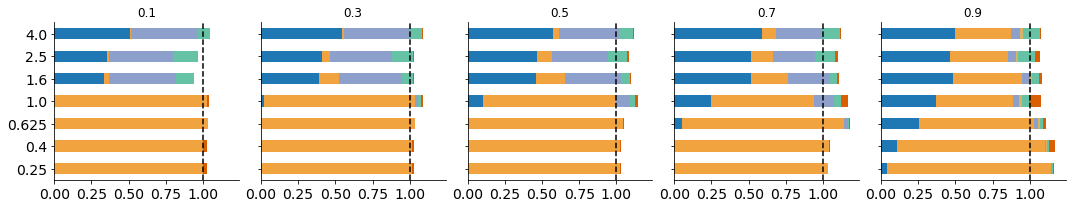

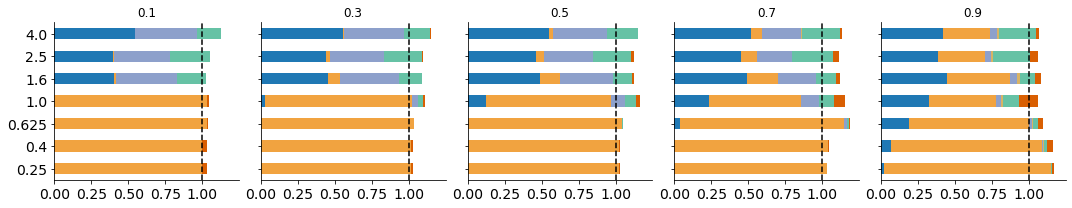

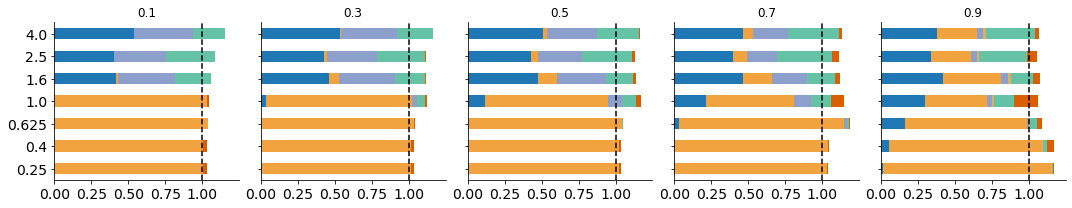

In [14]:
#Plot total index across P, Ks, fI, and S scenarios

colours = ['#1f78b4', '#f1a340', '#8da0cb', '#d8b365', '#66c2a5',
           '#d95f02', '#b2df8a']


for m,S in enumerate(Ss):  
    Si_all_s1=Si_all[Si_all['S']==S]
    fig, axes = plt.subplots(1,5,figsize = (15,3), sharex = True,sharey = True)
    for i,scenario in enumerate(fIs):
        dum = Si_all_s1[Si_all_s1.fI ==scenario]
        dum2=dum.sort_values('p_Ks')
        df = pd.pivot_table(data=dum2,
                        index='p_Ks',
                        values='Total',
                        columns='Name',aggfunc=np.mean)

        df.plot(kind='barh',stacked=True,ax=axes[i],color=colours)
        axes[i].set_title(scenario)
        axes[i].set_ylabel('')
        axes[i].axvline(x=1,ls='dashed',color='black')
        axes[i].set_xlabel('')
#         if  i==4:
#             axes[i].legend(fontsize=14,bbox_to_anchor=(1,1))
#         else:
        axes[i].legend_.remove()
        for label in (axes[i].get_xticklabels() + axes[i].get_yticklabels()):
            label.set_fontsize(14)  
    #     axes[i].set_ylim(0,1)
    sns.despine()
    fig.subplots_adjust(hspace=1)
    plt.tight_layout()
    name='sensitivity_all_stacked'+str(S)+'.pdf'
    plt.savefig(name)

findfont: Font family ['Myriad'] not found. Falling back to DejaVu Sans.


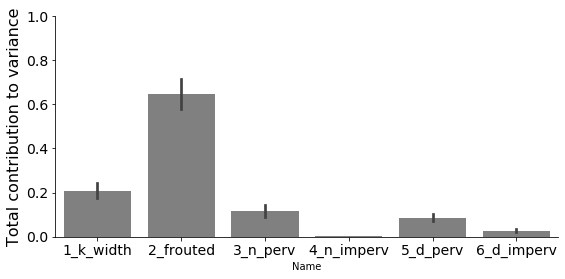

In [20]:
#Plot total index as a simplified barplot for main text

fig, axes = plt.subplots(1, figsize = (8,4))
sns.barplot(data=Si_all,x='Name',y='Total',ax=axes,color='grey')
plt.ylabel('Total contribution to variance',**axis_font)
plt.ylim(0,1)
sns.despine()
for label in (axes.get_xticklabels() + axes.get_yticklabels()):
    label.set_fontname('Myriad')
    label.set_fontsize(14)  
plt.tight_layout()
plt.savefig('sensitivity_all.pdf')